In [ ]:
import graphviz
from graphviz import Digraph

In [20]:
class Value:
    def __init__(self, id,dep_score=1,_children=(), _op=''):
        self.id = id
        self.dep_score = dep_score
        self._prev = set(_children)
        self._op = _op # the op that produced this node, for graphviz / debugging / etc
    def __radd__(self, other): # other + self
        return self + other
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        id = self.id + ' , ' + other.id
        print(f"id is {id}")
        dep_score = self.dep_score + other.dep_score
        print(f"dep score self {self.dep_score} and others {other.dep_score}")
        out = Value(id, dep_score, (self, other), '+')
        return out

In [21]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

In [22]:
def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ id %s | dep_score %.4f }" % (n.id, n.dep_score), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [23]:
sheet_name='dependency'
# Read the worksheet into a pandas DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [24]:
df

,srl num,requirement,dependency,requirement effort,dependency effort,dependency delivery sprint,dependency epic
0,1,P2G-100,devops,100,20,4,GDB-100
1,2,P2G-100,infra,100,10,3,PCM-100
2,3,P2G-101,ob,100,10,1,P2G-501


In [25]:
for index, row in df.iterrows():
    print(index, row['requirement'],row['requirement effort'] ,row['dependency effort'], row['dependency delivery sprint'],row['dependency epic'])

0 P2G-100 100 20 4 GDB-100
1 P2G-100 100 10 3 PCM-100
2 P2G-101 100 10 1 P2G-501


In [26]:
x = Value("P2G-100")

In [27]:
y = Value("P2G-101",5)

In [28]:
z = x + y 

id is P2G-100 , P2G-101
dep score self 1 and others 5


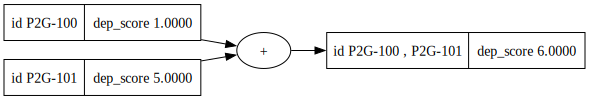

In [30]:
from graphviz import Digraph
draw_dot(z)